> 

# Project: Medical Appointment "No Shows" 

## Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be studying a case of patients that have scheduled medical appointments with their physicians, who received all the necessary instructions about their appointment but failed to show up on the appointed date. We will be analysing the selected dataset to identify trends and patterns among the existing variables (independent and dependent) that may facilitate the prediction of whether a patient will show up or not for a scheduled medical appointment.

> **The analysis will be tackling the following research questions:**
> 1. Which gender showed up the more for the doctor's medical appointment? 
> 2. Did scholarships influence the attendance of patients to doctor's medical appointment?
> 3. Did the disease type influence patients to show up for appointment?
> 4. If true, which disease type influenced patients the most?
> 5. Did SMS improve on patients' attendance?
> 6. What is the relationship between the age, gender, and attendance to doctor's appointment?

In [1]:
#To begin, we start by importing the necessary libraries for the analysis and using our magic word (%) to ensure that our visualization is well displayed within the notebook.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This section of the notebook will mainly consist of the data loading and cleaning before the exploratory analysis.
### General Properties

In [2]:
#Loading the csv file into jupyter notebook

df_appoint = pd.read_csv('noshowappointments.csv', sep=',')
df_appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> From a quick look into the dataframe, we can observe the different columns present and the unique data each of them contains. Interestingly, we can also observe that the data contained in columns such as Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received, are represented in ones (1) and zeros (0), which corresponds to true and false, respectively. In other words, 1 = true and 0 = false.

> Meanwhile, we will further assess the data to understand more about the nature of the data and its properties

In [3]:
#Taking a quick look into the shape of the data

print(df_appoint.shape)
df_appoint.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> From the shape above, we notice that the data has 110527 rows and 14 columns

In [4]:
#Taking a quick look into the number of missing values in each column

df_appoint.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> Here, we also notice that there are no missing values in the data set

In [5]:
#We can confirm this by also taking a look at the data info, which also shows the datatypes present

df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> In the info above, firstly, we notice that there are no null values in each row and column. Secondly, we also notice a problem with the date function in the "**ScheduledDay**" and "**AppointmentDay**" columns, which appears as objects (string) in the datatype rather than in a date format. These will constitute part of the analysis during data cleaning. 

> However, let's proceed to check for possible duplicates in the dataset

In [6]:
#Checking for the number of duplicated rows

df_appoint.duplicated().sum()

0

> So, we notice that there are no duplicated rows in the dataset.

> Next, we proceed to looking out the number of unique values contain in each column.

In [7]:
#Checking for the number of unique values

df_appoint.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> A quick look into the unique values found in the dataset showed that the different entries made for each column ranging from PatientId to No-show. However, contrary to the description of the dataset on the Kaggle database, Handcap column is seen to have 5 entries. Comparing this observation with other disease condition columns, we can see that they have only two entries, which includes 1 and 0, meaning true and fasle respectively. So, let's explore further to find out the unique entries in the Handcap column.

In [8]:
# unique values in column "Handcap"
print(df_appoint['Handcap'].unique())

# check the return type
print(type(df_appoint['Handcap'].unique()))

[0 1 2 3 4]
<class 'numpy.ndarray'>


> Based on this observation, we can clearly see that the column has values between 0 and 4. Hence, we assume that values greater than 1 might an error, since the description of the original dataset stated that entries imply only two values denoted as  true or false. So, we will convert values greater 1 back to 1 during data cleaning and assume that they imply "true"

In [9]:
#Let's have quick statistic analysis of the dataset

df_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Strikingly, we discover that the mean age of all the patients scheduled for appointments in May 2016 was 37 years. Also, the patients mostly fall within age range of 18 and 55 years. About 25% of the patients class interval fall within 18 years, whereas 75% contained patients around 55 years. Overall, the dataset reveals that we are dealing mostly with a younger demographic of patients that are within the early middle age of adulthood and a few more that are already wothin the late middle age. 

> Also, notice that there is a negative age value under the Age column, which is equal to '-1'. Ideally, it is impossible to have such an age value. Also, this outlier may distort the shape of our visualization and ultimately the result analysis. Hence, we will work on that row during the data cleaning process.

In [10]:
#Filtering out the negative value using the query function

df_appoint.query("Age == '-1'")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


### Data Cleaning
> This stage will involve all the necessary steps to ensuring that the dataset is clean and suitable for exploratory analysis.

> First, we begin by dropping some unnecessary columns that will not serve as potential use in the analysis,, particularly the PatientId.

In [11]:
#Dropping the PatientId column to declutter our dataset for more exploration.

df_appoint.drop(['PatientId'], axis=1, inplace=True)

# confirm changes
df_appoint.head(1)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> So, now that we have removed the PatientId, we will proceed to changing the ScheduledDay and AppointmentDay datatypes from object to a more suitable date format that we can work with during analysis. Notice that the date format, which is described in hours, minutes and seconds, was earlier shown in the datatype info to be an object. 

> Also, we will be retaining only the year, month and day for the ScheduledDay and AppointmentDay, whilst remaining the time.

In [12]:
#Adjusting the ScheduledDay and AppointmentDay datatypes from object to a more suitable date format

df_appoint['ScheduledDay'] = df_appoint['ScheduledDay'].str[:10]
df_appoint['AppointmentDay'] = df_appoint['AppointmentDay'].str[:10]

df_appoint['ScheduledDay'] = pd.to_datetime(df_appoint.ScheduledDay)
df_appoint['AppointmentDay'] = pd.to_datetime(df_appoint.AppointmentDay)

In [13]:
#To confirm the changes, let us re-check the datatype info

df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AppointmentID   110527 non-null  int64         
 1   Gender          110527 non-null  object        
 2   ScheduledDay    110527 non-null  datetime64[ns]
 3   AppointmentDay  110527 non-null  datetime64[ns]
 4   Age             110527 non-null  int64         
 5   Neighbourhood   110527 non-null  object        
 6   Scholarship     110527 non-null  int64         
 7   Hipertension    110527 non-null  int64         
 8   Diabetes        110527 non-null  int64         
 9   Alcoholism      110527 non-null  int64         
 10  Handcap         110527 non-null  int64         
 11  SMS_received    110527 non-null  int64         
 12  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), object(3)
memory usage: 11.0+ MB


### We are cool now!

> Next, we proceed to drop the negative age, because it is practically impossible to have a negative age value. We assume the inputted value could have been an error.

In [14]:
#First, let's find out the default index number automatically designated to the value by pandas.

df_appoint.query("Age == '-1'").index

Int64Index([99832], dtype='int64')

In [15]:
#Dropping the negative age value by the default index
df_appoint.drop([99832], axis=0, inplace=True)
print(df_appoint.query("Age == '-1'"))

Empty DataFrame
Columns: [AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


> We used the function above because we could observe that the dataframe has only one negative value under the Age column. However, if other negative values were present, then an alternative function could have been used to filter and drop all of them simultaenously.

> Finally, we have removed the negative age value.

In [16]:
#Taking a quick look into the summary statistics, as an alternative route of confirmation, we can notice that there is no negative age value in the table below.

df_appoint.describe()

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Earlier, our dataset info revealed that columns such Hipertension, Diabetes, Alcoholism, Handcap, and SMS_received, were denoted as integers represented in ones and zeros, which implied true and false respectively. However, in preparation to further exploration, let us change these integers into booleans to create two categories, true and false, for easy understanding and visualization of the data. Considering the nature of the dataset, this will help us make sense of those segments of the data represented in ones and zeros.

> Next, we will also be converting the Gender column into categorical data, which possess discrete values, for easy visualization during data exploration

In [17]:
#Changing the Gender column into categorical data and confirming changes
df_appoint['Gender'] = df_appoint['Gender'].astype('category')

df_appoint['Gender'].dtypes

CategoricalDtype(categories=['F', 'M'], ordered=False)

> At this point, we will proceed to handling the Handcap column and converting values greater 1 (that is values between 2 and 4) back to 1 and assume that they imply "true"

In [18]:
#Let us find out the number of values greater than 1 under the Handcap column
df_appoint[df_appoint['Handcap'] >= 2].count()

AppointmentID     199
Gender            199
ScheduledDay      199
AppointmentDay    199
Age               199
Neighbourhood     199
Scholarship       199
Hipertension      199
Diabetes          199
Alcoholism        199
Handcap           199
SMS_received      199
No-show           199
dtype: int64

> Eventually, we have 199 values greater 1  under the Handcap column. So, we will be changing these values back to 1, assuming that they are "true"

In [19]:
#Changing the values to 1
df_appoint.loc[df_appoint['Handcap'].isin([2, 3, 4]), 'Handcap'] = 1

# casting type and confirming changes
df_appoint['Handcap'] = df_appoint['Handcap'].astype('bool')
df_appoint['Handcap'].unique()

array([False,  True])

In [20]:
#Confirming that the changes have been effected
print(df_appoint.query("Handcap >= 2"))

Empty DataFrame
Columns: [AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show]
Index: []


> There are no values greater than 1 in the Handcap column anymore

In [21]:
#Changing the columns from integers to booleans datatypes

sel_col = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df_appoint[sel_col] = df_appoint[sel_col].astype('bool')
df_appoint[sel_col].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

In [22]:
#Let us convert No-show column to boolean using a different approach. Why?
#When the patient show up, it reads 'No'; but when absent it reads 'Yes'.
#Let us convert that to boolean, which implies '0' for absence (true) and '1' for presence (false).

df_appoint.loc[df_appoint['No-show'] == 'Yes', 'No-show'] = 0
df_appoint.loc[df_appoint['No-show'] == 'No', 'No-show'] = 1

# Let us now cast the data types and verify our changes have been effected
df_appoint['No-show'] = df_appoint['No-show'].astype(bool)
df_appoint['No-show'].dtypes

dtype('bool')

In [23]:
#Let us confirm the changes...

print(df_appoint.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   AppointmentID   110526 non-null  int64         
 1   Gender          110526 non-null  category      
 2   ScheduledDay    110526 non-null  datetime64[ns]
 3   AppointmentDay  110526 non-null  datetime64[ns]
 4   Age             110526 non-null  int64         
 5   Neighbourhood   110526 non-null  object        
 6   Scholarship     110526 non-null  bool          
 7   Hipertension    110526 non-null  bool          
 8   Diabetes        110526 non-null  bool          
 9   Alcoholism      110526 non-null  bool          
 10  Handcap         110526 non-null  bool          
 11  SMS_received    110526 non-null  bool          
 12  No-show         110526 non-null  bool          
dtypes: bool(7), category(1), datetime64[ns](2), int64(2), object(1)
memory usage: 5.9+ MB
Non

> Taking a look at the datatypes, we can now observe the changes.

In [24]:
#Now, let us have overview of the first 10 rows in the dataset to see the effect of what we have done
df_appoint

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True
1,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True
2,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True
3,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True
4,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True
110523,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True
110524,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True
110525,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True


> In essence, this implies that a disease condition is present when the boolean reads "true", while it is absent when it reads "false". also, patients that showed are denoted as "false", while those that failed to show up are denoted as "true". 

> Now, we are ready for exploratory data analysis

<a id='eda'></a>
## Exploratory Data Analysis
Now, we can commence our data exploration. We will examining one variable at a time and then in relation with each other.


### 1. Which gender showed up the more for the doctor's medical appointment?

In [25]:
#Let us find out the number of patients in each gender category

df_appoint['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

> We have **71839** female patients and **38687** male patients

Text(0, 0.5, 'Count')

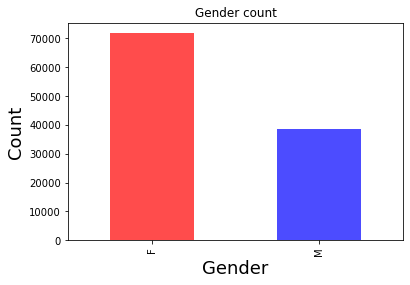

In [26]:
#Making a visualization of the gender counts

colors = ['red', 'blue']
Gender_count = df_appoint['Gender'].value_counts()
Gender_count.plot(kind='bar', title='Gender count', color=colors, alpha=.7);
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Count', fontsize=18)

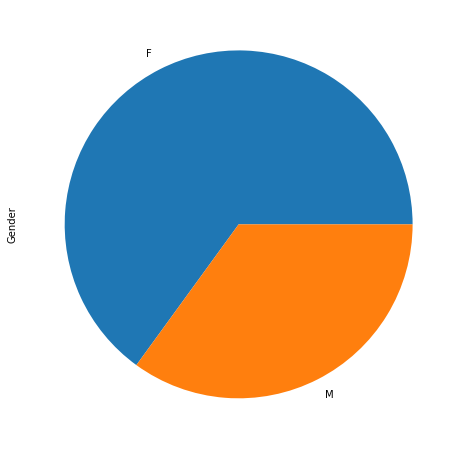

In [27]:
ind = df_appoint['Gender'].value_counts().index
df_appoint['Gender'].value_counts()[ind].plot(kind='pie', figsize=(8,8));

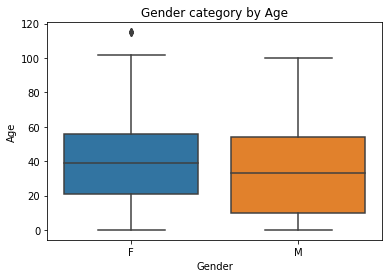

In [28]:
#Plotting the Gender category by Age

sns.boxplot(x = 'Gender', y = 'Age', data = df_appoint)
plt.title("Gender category by Age")
plt.show()

> This confirms that we have more females patients than males that were scheduled to meet with the doctor in March 2016. Interestingly, these females fall within a broader age bracket ranging between 22 and 58 years with an outlier above 100 years. The males are densely sparsed around 16 and 57 years.

C:\Users\LENOVO\anaconda3\envs\ucpy3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

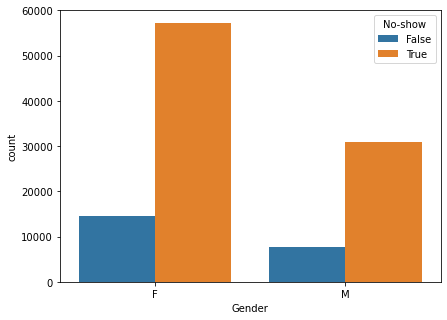

In [29]:
#Assessing the gender category for the gender with highest attendance to doctor's appointment using "No-show" column
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot('Gender', hue='No-show', data=df_appoint)

> The data visualization shows that we have more female patients in attendance to doctor's appointment than their male counterparts. However, this observation remains tentative until confirmed using inferential statistics and machine learning that gender factor contributes significantly to attending doctor's appointment.

### 2. Did scholarships influence the attendance of patients to doctor's medical appointment?

In [30]:
#First, let us find out the number of scholarship recipients

df_appoint['Scholarship'].value_counts()

False    99665
True     10861
Name: Scholarship, dtype: int64

> This implies that **10861** patients received scholarship while **99665** patients did not receive, meaning that a smaller percentage were beneficiaries. A visualization of this data below will throw more lights.

Text(0, 0.5, 'Number of recipients')

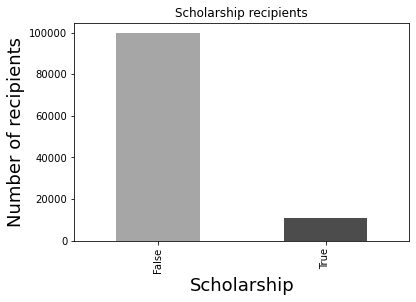

In [31]:
colors = ['grey', 'black']
Gender_count = df_appoint['Scholarship'].value_counts()
Gender_count.plot(kind='bar', title='Scholarship recipients', color=colors, alpha=.7);
plt.xlabel('Scholarship', fontsize=18)
plt.ylabel('Number of recipients', fontsize=18)

C:\Users\LENOVO\anaconda3\envs\ucpy3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Scholarship', ylabel='count'>

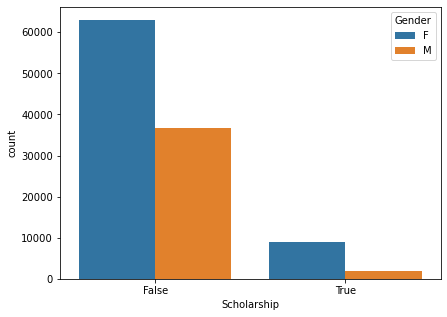

In [32]:
#Assessing the number of scholarship recipients based on their gender category
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot('Scholarship', hue='Gender', data=df_appoint)

> From the visualization, we can observe that there were lesser recipients of the scholarship. Comparatively, there is a higher number of female recipients relative to the male. Similarly, there is a higher number of females that did not receive the scholarship relative to the males in that category. 

> I think this scenario can be explained based on the ratio of female to male in the dataset. There are more females to male in the dataset. Hence, this somewhat created a disproportionate ratio. However, it also points to the fact that more females visited the hospital and scheduled appointment with the doctor in March 2016.

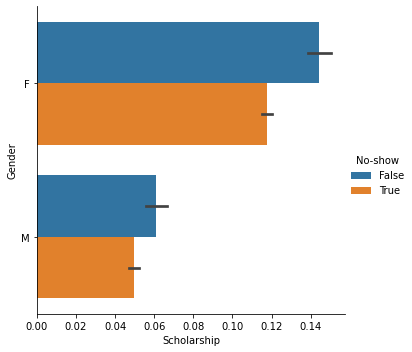

In [33]:
#Assessing the ratio of males to females by scholarship benefits that showed up for their appointment

sns.catplot(x="Scholarship", y="Gender", hue="No-show", kind="bar", data=df_appoint)

> This visualization confirms that females were more beneficiaries of the scholarship relative to their male counterparts. Interestingly, it also points out the females were the most present patients with regards to their appointments. 

> So, could it be that the scholarship benefits prompted more female patients to the hospital? This observation is inconclusive yet until a confirmatory analysis is performed using inferential statistics or machine learning algorithms.

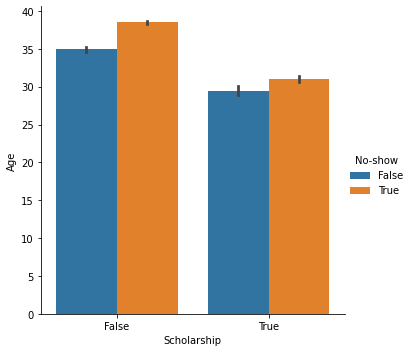

In [34]:
#Assessing the age bracket by scholarship benefits that showed up for their appointment

sns.catplot(x="Scholarship", y="Age", hue="No-show", kind="bar", data=df_appoint)

> This visualization provides deeper insights and leaves us with more questions for inferential analysis.

> From observation, under the category that did not receive scholarship (showed as "false" in the x-axis), we can clearly see that there were patients between age 0 and approx. 37 that showed up for their appointment (denoted in orange), while some of their counterparts between 0 and 35 years did not show up. The age difference is not big enough to make a conclusive statement yet.

> Furthermore, under the category of those that received scholarships (showed as "true" in the x-axis), we can also see that some patients from approx. 30 years and below showed up their appointment, while some of their counterparts between approx. 32 years and below failed to show.

> The relationship between age, scholarship benefits and attendance to the patients' scheduled appointment is not clear. Hence, there is need to further explore these features in future analysis.

### 3. Did the disease type influence patients to show up for appointment?

C:\Users\LENOVO\anaconda3\envs\ucpy3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\anaconda3\envs\ucpy3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\LENOVO\anaconda3\envs\ucpy3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

<AxesSubplot:xlabel='Handcap', ylabel='count'>

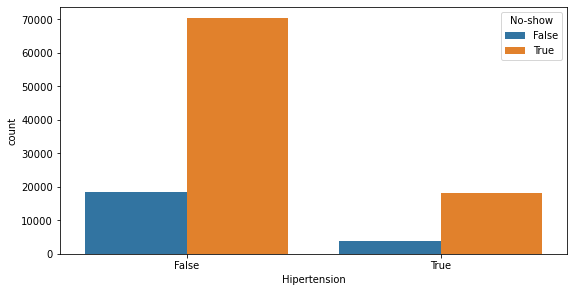

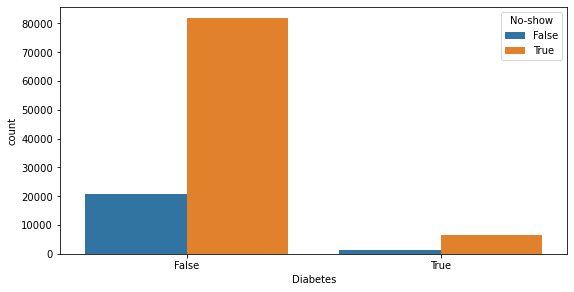

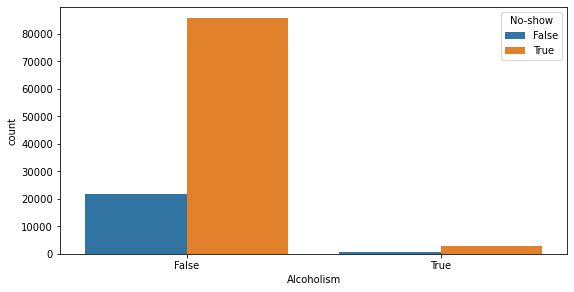

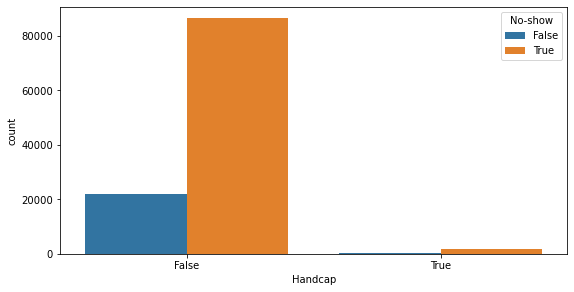

In [35]:
#Assessing the number of patients that showed up based on their disease type

#Hipertensiion
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot('Hipertension', hue='No-show', data=df_appoint)

#Diabetes
plt.figure(figsize=(20,10))
plt.subplot(2,2,2)
sns.countplot('Diabetes', hue='No-show', data=df_appoint)

#Alcoholism
plt.figure(figsize=(20,10))
plt.subplot(2,2,3)
sns.countplot('Alcoholism', hue='No-show', data=df_appoint)

#Handcap
plt.figure(figsize=(20,10))
plt.subplot(2,2,4)
sns.countplot('Handcap', hue='No-show', data=df_appoint)

> This shows that attendance to the scheduled appointment was not dependent on the disease types. Generally, most of the disease conditions reflected little attendance to their appointments.

> However, let us further assess the prevalence of the disease types in the age and gender distribution.

In [36]:
#Creating the function to analyze the disease types

def vplot( _x = '', _y = '', _hue = '', _kind = '', _df = ''):
    sns.catplot(x= _x, y= _y, hue= _hue, kind = _kind, data = _df)

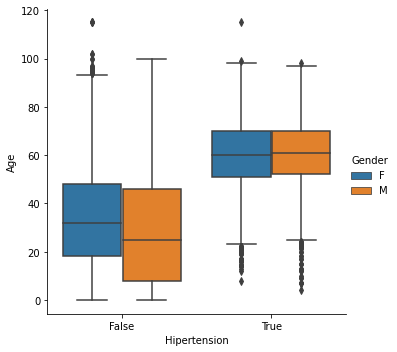

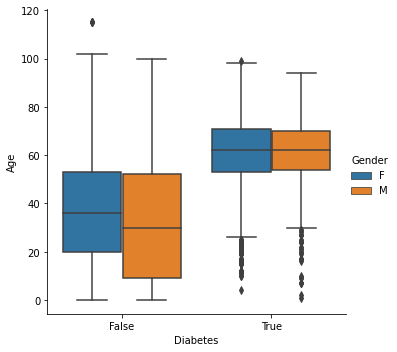

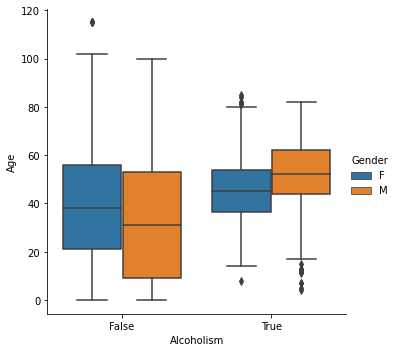

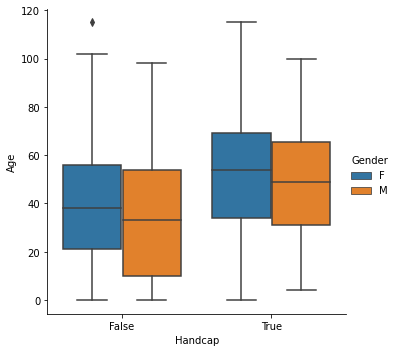

In [37]:
#Assessing the disease type by the age and gender distribution by calling the function

_var = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
x = 0
for r in _var:
    vplot( _x = _var[x], _y = 'Age', _hue = 'Gender', _kind = 'box', _df = df_appoint)
    x = x+1

> This age and gender distribution in relation to the various disease types showed that the patients between middle and late adulthood were more susceptible and diagnosed of the various diseases, particularly the female patients. 

> However, the previous analysis showed that attendance to a scheduled doctor's appointment was not dependent on the disease conditions, as we observed little attendance even when the diseases were present.

### 4. If true, which disease type influenced patients the most?

> The previous analysis did not show any significant relationship between the patients' attendance to the doctor's appointment and the disease type. However, this is still tentative.

### 5. Did SMS improve on patients' attendance?

In [38]:
#First, let us find out the total number of SMS received by the patients

df_appoint['SMS_received'].value_counts()

False    75044
True     35482
Name: SMS_received, dtype: int64

>This means that a total of **35482** SMS were received by the patients

In [39]:
#Let us go further to find out how many SMS were received by each gender category

df_appoint.groupby('Gender')['SMS_received'].value_counts()

Gender  SMS_received
F       False           47637
        True            24202
M       False           27407
        True            11280
Name: SMS_received, dtype: int64

> WOW!!! From the analysis, we can clearly see that more female patients (**24202**) received more SMS than their male (**11280**) counterparts. So, could this account for why we have more females in attendance? Or, could it be as a result of the disproportionate ratio of females to males in the distribution? Whatever the reason might be, we cannot tell for sure until an inferential analysis is conducted to ascertain if the difference between the ratio of female to male is significant.

Text(0, 0.5, 'Number of recipients')

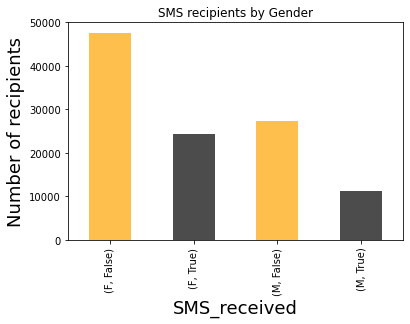

In [40]:
#Let us have a visualization of the information above.

colors = ['orange', 'black']
sms = df_appoint.groupby('Gender')['SMS_received'].value_counts()
sms.plot(kind='bar', title='SMS recipients by Gender', color=colors, alpha=.7);
plt.xlabel('SMS_received', fontsize=18)
plt.ylabel('Number of recipients', fontsize=18)

> In above visualization, we can clearly observe the number of recipients for both male and female patients that received the SMS.

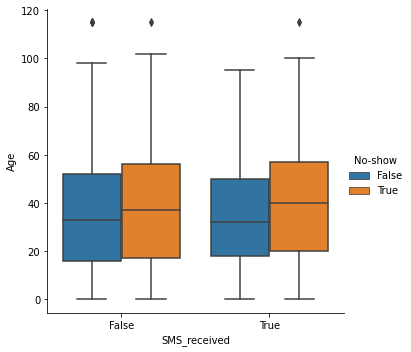

In [41]:
#Let us assess the age distribution of the patients that received SMS and how it influenced their attendance to the appointment

sns.catplot(x="SMS_received", y="Age", hue="No-show", kind="box", data=df_appoint)

> This visualization shows that patients that received SMS majorly fell within the age category between 20 and 60 years. However, from this category, those that showed up for their appointment fell within 20 and 58 years (denoted in blue on the right side of the boxplot), although some of their counterparts in the same category did not show up for their appointment.

C:\Users\LENOVO\anaconda3\envs\ucpy3.6\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SMS_received', ylabel='count'>

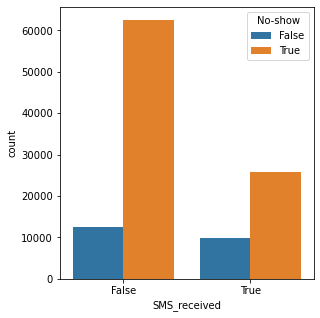

In [42]:
#Examining the impact of the SMS on their turnup

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot('SMS_received', hue='No-show', data=df_appoint)

> This visualization shows that the patients' attendance to their appointment may be dependent on the SMS received. This is because there are fewer patients that received SMS compared to the patients that did not receive. Perhaps, many of the absentees forgot about their appointment on failure to receive an SMS.

> Additionally, previous analysis showed more female patients received SMS compared to the male patients. Hence, from the visualization above, I wish to speculate that the number of patients that showed up could consist mainly of women. However, this is subject to further investigation, as the current data limits such studies.

### 6. What is the relationship between the age, gender, and attendance to doctor's appointment?

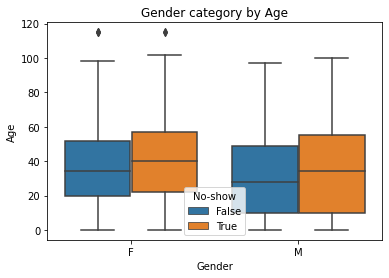

In [43]:
#Analysing the age and gender distribution in relation to their attendence to the doctor's appointment

sns.boxplot(x = 'Gender', y = 'Age', hue="No-show", data = df_appoint)
plt.title("Gender category by Age")
plt.show()

> The visualization shows that most of the female patients that showed up for their appointment fell within the age category of 20 and 5o years, whereas those that did not show up also fell at a closer range between 22 and 58 years. Overall, there are more older female patients that showed up compared to the males.

> The male patients that showed up for their appointment fell within age category of 16 and 50 years, whereas those that did not show up fell within the age category of 16 and 54 years.

> Hence, we can see that patients of the younger demographic, including adolescents, early and middle adulthood, consisted of the majority of patients that visited the hospital for the doctor's appointment. 

<a id='conclusions'></a>
## Conclusion
> 1. Originally, the dataset contained a total **110527** rows and **14** columns with neither any missing nor duplicated value. However, after dropping some columns, the dataset contains **110526** rows and **13** columns. 

> **Note:** The mean age of the patients in the dataset is 37 years.

> 2. Analysis showed that the dataset contains details on 71839 female patients and 38687 male patients. Hence, we can assert that there were more female patients than males scheduled for a doctor's appointment in March 2016. And this disporportionate ratio of female to male in the month may likely affect the outcome of the analysis. Hence, there is need for further inferential analysis to ascertain the significant difference in the ratio and consequentially reflect the reliability of the findings.

> 3. Analysis also revealed that the females fall within a broader age bracket ranging between 22 and 58 years with an outlier above 100 years, whereas the males are densely sparsed around 16 and 57 years.

> 4. In the analysis, there were more female patients that showed up for the doctor's appointment compared to the males. However, this observation remains tentative until confirmed using inferential statistics and machine learning, considering the disproportionate ratio of the female and male patients in March 2016.

> 5. Furthermore, 10861 patients received scholarship while 99665 patients did not receive, meaning that a smaller percentage of the entire patients for the month were beneficiaries of the scholarship given by the government. Among these beneficiaries, a higher percentage consisted mainly of the female patients. However, this may be attributed to the disproportionate ratio of female to male in the month. Hence, no conclusion has been made regarding this fact.

> 6. Following the assessment of the relationship between the patients' age, scholarship benefit and attendance to the scheduled appointment, there is no clear relationship between the variables. Hence, there is need to further explore this area using other instruments or approach.

> 7. Analysis showed that attendance to the doctor's appointment was not dependent on the disease types, as patients under most of the disease conditions reflected little attendance to their appointments.

> 8. Further analysis on the age and gender distribution in relation to the various disease types showed that the patients between middle and late adulthood were more susceptible and diagnosed of the various diseases, particularly the female patients compared to their male counterparts.

> 9. From the analysis, it was observed that a total of 35482 SMS' were received by the patients. The female patients (24202) received more SMS than their male (11280) counterparts. Meanwhile, the nature of the dataset limited the analysis from properly matching the gender with the attendance of the patients in relation to those that received the SMS. However, those that received SMS majorly fell within the age category between 20 and 60 years. And from this category, those that showed up for their appointment fell within 20 and 58 years (denoted in blue on the right side of the boxplot), although some of their counterparts in the same category did not show up for their appointment.

> Conclusively, we may speculate that patients' attendance to their appointment may be dependent on the SMS received. This is because fewer patients received SMS compared to the patients that did not receive. Hence, we can assume that most of the absentees forgot about their appointment on failure to receive an SMS. Also, as much as these discoveries sheds so much light about some trends in the data with regards to the highest attendance by the females, however the findings remain inconclusive until an inferential analysis is conducted to confirm the results that SMS improved the attendance of the female patients.

> ## List of sources

> 1. https://mode.com/python-tutorial/counting-and-plotting-in-python/
> 2. https://www.statology.org/pandas-unique-values-in-column/
> 3. https://medium.com/dunder-data/select-a-single-column-of-a-pandas-dataframe-with-the-brackets-and-not-dot-notation-a5ec981cbae6
> 4. https://www.geeksforgeeks.org/how-to-select-single-column-of-a-pandas-dataframe/
> 5. https://datascienceparichay.com/article/pandas-get-all-unique-values-in-a-column/
> 6. https://pandas.pydata.org/docs/user_guide/categorical.html
> 7. https://itsmycode.com/positional-argument-follows-keyword-argument/#:~:text=In%20Python%2C%20the%20SyntaxError%3A%20positional,the%20keyword%20arguments%20as%20next.
> 8. https://stackoverflow.com/questions/48238305/bar-plot-with-groupby
> 9. https://www.statology.org/pandas-groupby-plot/
> 10. https://seaborn.pydata.org/tutorial/categorical.html
> 11. https://seaborn.pydata.org/generated/seaborn.countplot.html
> 12. https://www.geeksforgeeks.org/how-to-select-multiple-columns-in-a-pandas-dataframe/
> 13. https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
> 14. https://seaborn.pydata.org/generated/seaborn.boxplot.html
> 15. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
> 16. https://www.youtube.com/watch?v=4DnWYK88-E4
    